Creating dataset of Student Performance

In [1]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_instances = 30


math_scores = np.random.randint(60, 81, num_instances)
reading_scores = np.random.randint(75, 96, num_instances).astype(float)
writing_scores = np.random.randint(60, 81, num_instances)
placement_scores = np.random.randint(75, 101, num_instances).astype(float) 
club_join_dates = np.random.randint(2018, 2022, num_instances)
placement_offer_count = (placement_scores / 10).astype(int) 

# Introduce exactly NaN values into each column
num_impurities = int(0.2 * num_instances)
nan_indices_reading = np.random.choice(num_instances, size=num_impurities, replace=False)
nan_indices_placement = np.random.choice(num_instances, size=num_impurities, replace=False)


reading_scores[nan_indices_reading] = np.nan
placement_scores[nan_indices_placement] = np.nan


df = pd.DataFrame({
    "Math_Score": math_scores,
    "Reading_Score": reading_scores,
    "Writing_Score": writing_scores,
    "Placement_Score": placement_scores,
    "Club_Join_Date": club_join_dates,
    "Placement_Offer_Count": placement_offer_count
})

df.to_csv("StudentsPerformance.csv", index=False)

print("Dataset saved as 'StudentsPerformance.csv'")



Dataset saved as 'StudentsPerformance.csv'


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('StudentsPerformance.csv')
data

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,66,94.0,69,93.0,2020,9
1,79,77.0,63,NaN,2019,9
2,74,NaN,77,82.0,2020,8
3,70,93.0,71,77.0,2018,7
4,67,NaN,61,77.0,2018,7
5,80,95.0,69,75.0,2019,7
6,66,83.0,63,79.0,2020,7
7,78,NaN,73,84.0,2020,8
8,70,92.0,75,81.0,2019,8
9,70,78.0,74,100.0,2020,10


In [19]:
data1 = data.copy()
data2 = data.copy()

In [20]:
#describing the data
data.describe()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
count,30.000000,24.000000,30.000000,24.000000,30.000000,30.000000
mean,70.966667,85.333333,70.266667,83.791667,2019.500000,7.900000
std,6.283439,6.644165,5.438898,7.994450,1.042213,0.884736
min,60.000000,76.000000,60.000000,75.000000,2018.000000,7.000000
25%,66.250000,79.500000,67.000000,77.000000,2019.000000,7.000000
50%,71.000000,84.500000,71.000000,82.000000,2020.000000,8.000000
75%,75.750000,92.000000,74.000000,87.000000,2020.000000,8.750000
max,80.000000,95.000000,80.000000,100.000000,2021.000000,10.000000


**Handling Null Values**

In [21]:
data.isna().sum()

Math_Score               0
Reading_Score            6
Writing_Score            0
Placement_Score          6
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64

In [22]:
#filling null values for first data for minmax scaling
data['Reading_Score'] = data['Reading_Score'].fillna(data['Reading_Score'].mean())
data['Placement_Score'] = data['Placement_Score'].fillna(data['Placement_Score'].median())
data.isna().sum()

Math_Score               0
Reading_Score            0
Writing_Score            0
Placement_Score          0
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64

In [23]:
#filling null values for second data for normlization
data1['Reading_Score'] = data1['Reading_Score'].fillna(data1['Reading_Score'].mean())
data1['Placement_Score'] = data1['Placement_Score'].fillna(data1['Placement_Score'].median())
data1.isna().sum()

Math_Score               0
Reading_Score            0
Writing_Score            0
Placement_Score          0
Club_Join_Date           0
Placement_Offer_Count    0
dtype: int64

**Detecting and handling outliers**

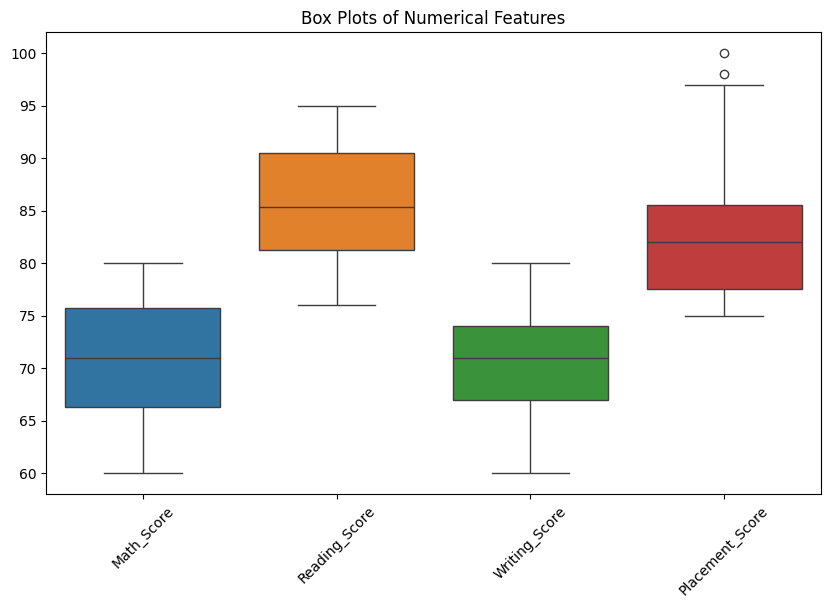

In [24]:
# Box plot for all numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score']])
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [25]:
#handling outlier using iqr
def handle_outlier(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5* IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column]> upper_bound,upper_bound,data[column])
    data[column] = np.where(data[column] < lower_bound,lower_bound,data[column])
    return data
data = handle_outlier(data, 'Math_Score')
data = handle_outlier(data, 'Reading_Score')
data = handle_outlier(data, 'Writing_Score')
data = handle_outlier(data, 'Placement_Score')

In [26]:
data

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,66.0,94.000000,69.0,93.0,2020,9
1,79.0,77.000000,63.0,82.0,2019,9
2,74.0,85.333333,77.0,82.0,2020,8
3,70.0,93.000000,71.0,77.0,2018,7
4,67.0,85.333333,61.0,77.0,2018,7
5,80.0,95.000000,69.0,75.0,2019,7
6,66.0,83.000000,63.0,79.0,2020,7
7,78.0,85.333333,73.0,84.0,2020,8
8,70.0,92.000000,75.0,81.0,2019,8
9,70.0,78.000000,74.0,97.5,2020,10


In [27]:
#handling the outlier using zscore
from scipy import stats
import pandas as pd
import numpy as np

def handle_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column]))
    data_filtered = data[(z_scores < threshold)]
    return data_filtered
data1 = handle_outliers_zscore(data1, 'Math_Score')
data1 = handle_outliers_zscore(data1, 'Reading_Score')
data1 = handle_outliers_zscore(data1, 'Writing_Score')
data1 = handle_outliers_zscore(data1, 'Placement_Score')
data1

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,66,94.000000,69,93.0,2020,9
1,79,77.000000,63,82.0,2019,9
2,74,85.333333,77,82.0,2020,8
3,70,93.000000,71,77.0,2018,7
4,67,85.333333,61,77.0,2018,7
5,80,95.000000,69,75.0,2019,7
6,66,83.000000,63,79.0,2020,7
7,78,85.333333,73,84.0,2020,8
8,70,92.000000,75,81.0,2019,8
9,70,78.000000,74,100.0,2020,10


**Data Normalization**

In [28]:
#using minmax Normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
data_scaled = pd.DataFrame(min_max_scaler.fit_transform(data[data.columns]), columns=data.columns, index=data.index)  
data = data_scaled
data

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,0.30,0.947368,0.45,0.800000,0.666667,0.666667
1,0.95,0.052632,0.15,0.311111,0.333333,0.666667
2,0.70,0.491228,0.85,0.311111,0.666667,0.333333
3,0.50,0.894737,0.55,0.088889,0.000000,0.000000
4,0.35,0.491228,0.05,0.088889,0.000000,0.000000
5,1.00,1.000000,0.45,0.000000,0.333333,0.000000
6,0.30,0.368421,0.15,0.177778,0.666667,0.000000
7,0.90,0.491228,0.65,0.400000,0.666667,0.333333
8,0.50,0.842105,0.75,0.266667,0.333333,0.333333
9,0.50,0.105263,0.70,1.000000,0.666667,1.000000


In [29]:
#using zscore for normalization
from scipy.stats import zscore

def normalize_data(data):
    numerical_cols = data1.columns

    # Apply z-score normalization
    for col in numerical_cols:
        data[col] = zscore(data[col])

    return data

data1 = normalize_data(data)
data1

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date,Placement_Offer_Count
0,-0.803950,1.489733e+00,-0.236872,1.418012,0.48795,1.264563
1,1.300349,-1.432435e+00,-1.358895,-0.195588,-0.48795,1.264563
2,0.491003,-3.625936e-16,1.259160,-0.195588,0.48795,0.114960
3,-0.156474,1.317841e+00,0.137136,-0.929043,-1.46385,-1.034642
4,-0.642081,-3.625936e-16,-1.732903,-0.929043,-1.46385,-1.034642
5,1.462218,1.661625e+00,-0.236872,-1.222424,-0.48795,-1.034642
6,-0.803950,-4.010819e-01,-1.358895,-0.635661,0.48795,-1.034642
7,1.138480,-3.625936e-16,0.511144,0.097794,0.48795,0.114960
8,-0.156474,1.145948e+00,0.885152,-0.342279,-0.48795,0.114960
9,-0.156474,-1.260543e+00,0.698148,2.078122,0.48795,2.414165


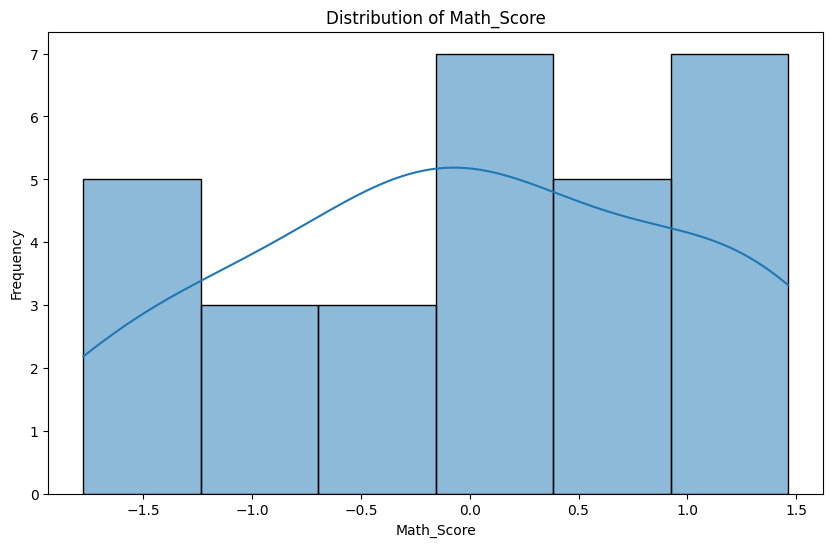

Skewness of Math_Score: -0.10104718790415089
Math_Score is fairly symmetrical


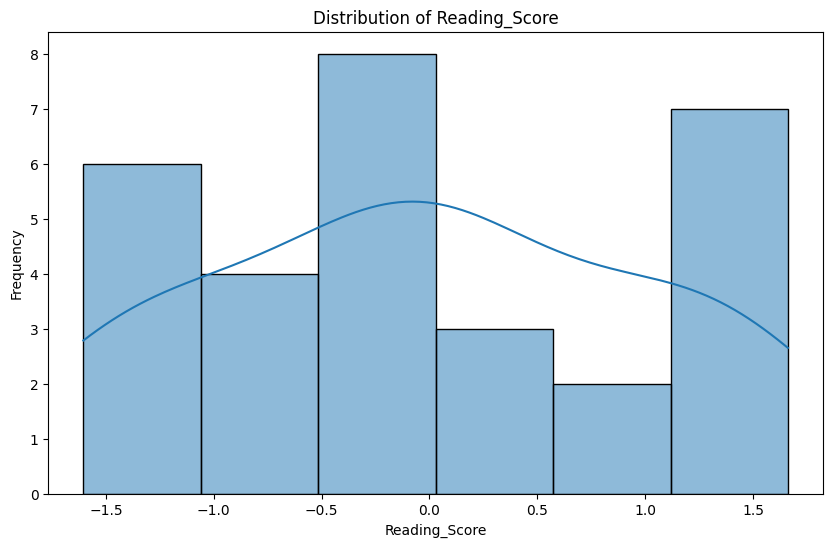

Skewness of Reading_Score: 0.028851481680230343
Reading_Score is fairly symmetrical


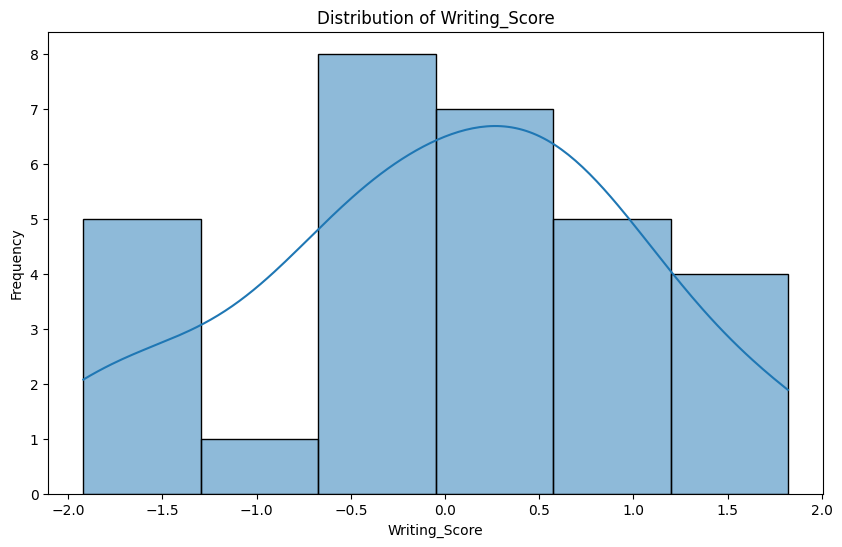

Skewness of Writing_Score: -0.24268945522328003
Writing_Score is fairly symmetrical


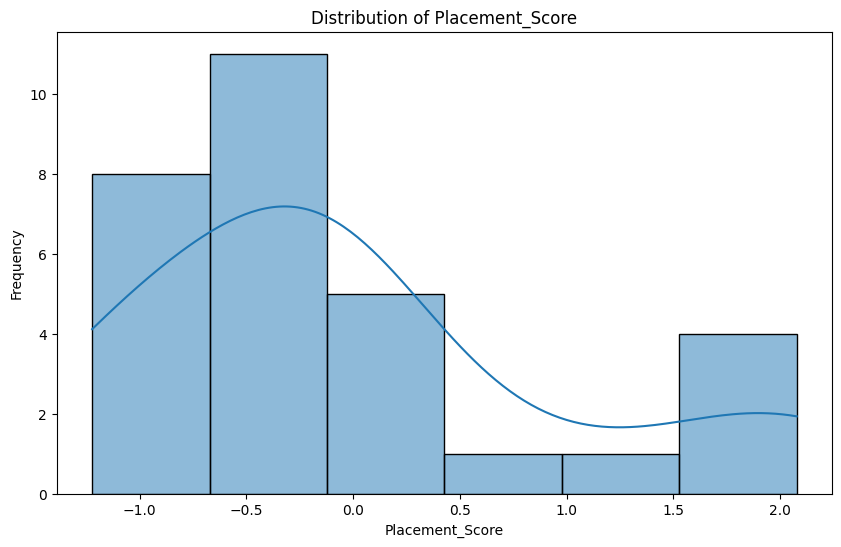

Skewness of Placement_Score: 0.9706086380422002
Placement_Score is skewed


In [30]:
#plotting histogram for checking the skweness of attributes
def plot_skewness(data,column):
    plt.figure(figsize=(10,6))
    sns.histplot(data[column],kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    skewness = data[column].skew()
    print(f"Skewness of {column}: {skewness}")
    if skewness > 0.5 or skewness < -0.5 :
      print(f'{column} is skewed')
    else:
      print(f'{column} is fairly symmetrical')
plot_skewness(data, 'Math_Score')
plot_skewness(data, 'Reading_Score')
plot_skewness(data, 'Writing_Score')
plot_skewness(data, 'Placement_Score')